In [24]:
import os
import requests
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [29]:
images_path = os.path.expanduser('~/data/marki/images')
# query_image_name = 'MZ2316a.jpg'
query_image_name = 'BZ2221a.jpg'

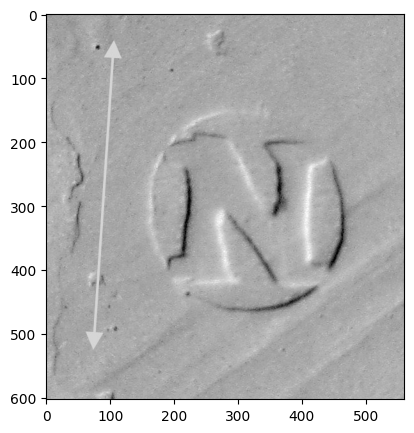

In [30]:
# first let's visualize the query image
query_path = os.path.join(images_path,query_image_name)
query_image = cv2.imread(query_path)
plt.figure(figsize=(5,5))
plt.imshow(query_image)

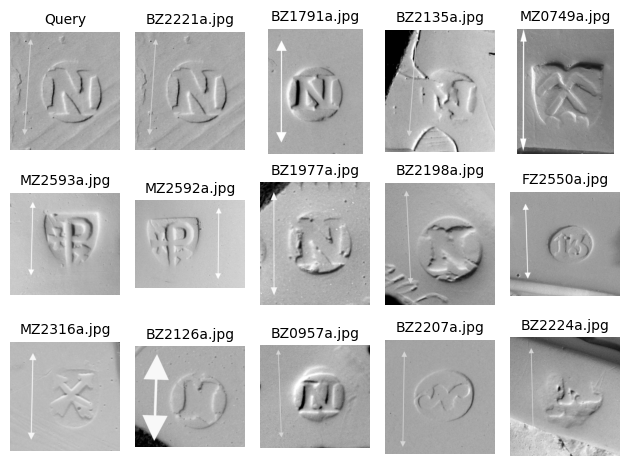

In [31]:
num_results = 14

# now let's query the webservice and check the results
endpoint_url = f'http://localhost:8000/retrieve/{num_results}' # change the number of results if needed

# send image to api
with open(query_path, 'rb') as f:
    response = requests.post(endpoint_url, files={"file": f})

# parse response and read images
retrieved_fns = response.json()['similar_images']
images = [query_image]
titles = ["Query"]
for fn in retrieved_fns:
    result_image_path = os.path.join(images_path,fn)
    images.append(cv2.imread(result_image_path))
    titles.append(fn)

# visualize results
num_images = len(images)
cols = min(5, num_images)
rows = int(np.ceil(num_images/cols))

for i, (img, title) in enumerate(zip(images, titles)):
    ax = plt.subplot(rows, cols, i + 1)
    ax.imshow(img)
    ax.set_title(title, fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()